### Visualizing accidents severity with the focus on extracted features with importance

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
from plotnine import *

pd.set_option('display.max_columns', None)

df_collisions = pd.read_csv(os.path.join('../00_data', 'collisions_data_2000_2022.csv'), usecols = ['accident_index', 
                                                                   'accident_year',
                                                                   'longitude',
                                                                   'latitude',  
                                                                   'accident_severity',
                                                                   'number_of_casualties',
                                                                   'junction_detail',
                                                                   'junction_control',
                                                                   'speed_limit',
                                                                   'road_type',
                                                                   'urban_or_rural_area'], low_memory = False)

##### The total number of road accidents has been steadily decreasing over the studied period. However, fatal accidents have shown fluctuations, hovering around 1500 cases annually since 2012 and reaching their lowest point in 2020. The number of slight accidents has been decreasing over the given period, leading to an increase in the share of fatal accidents from 2014 to 2020, even though the absolute number of fatal accidents remained approximately the same.

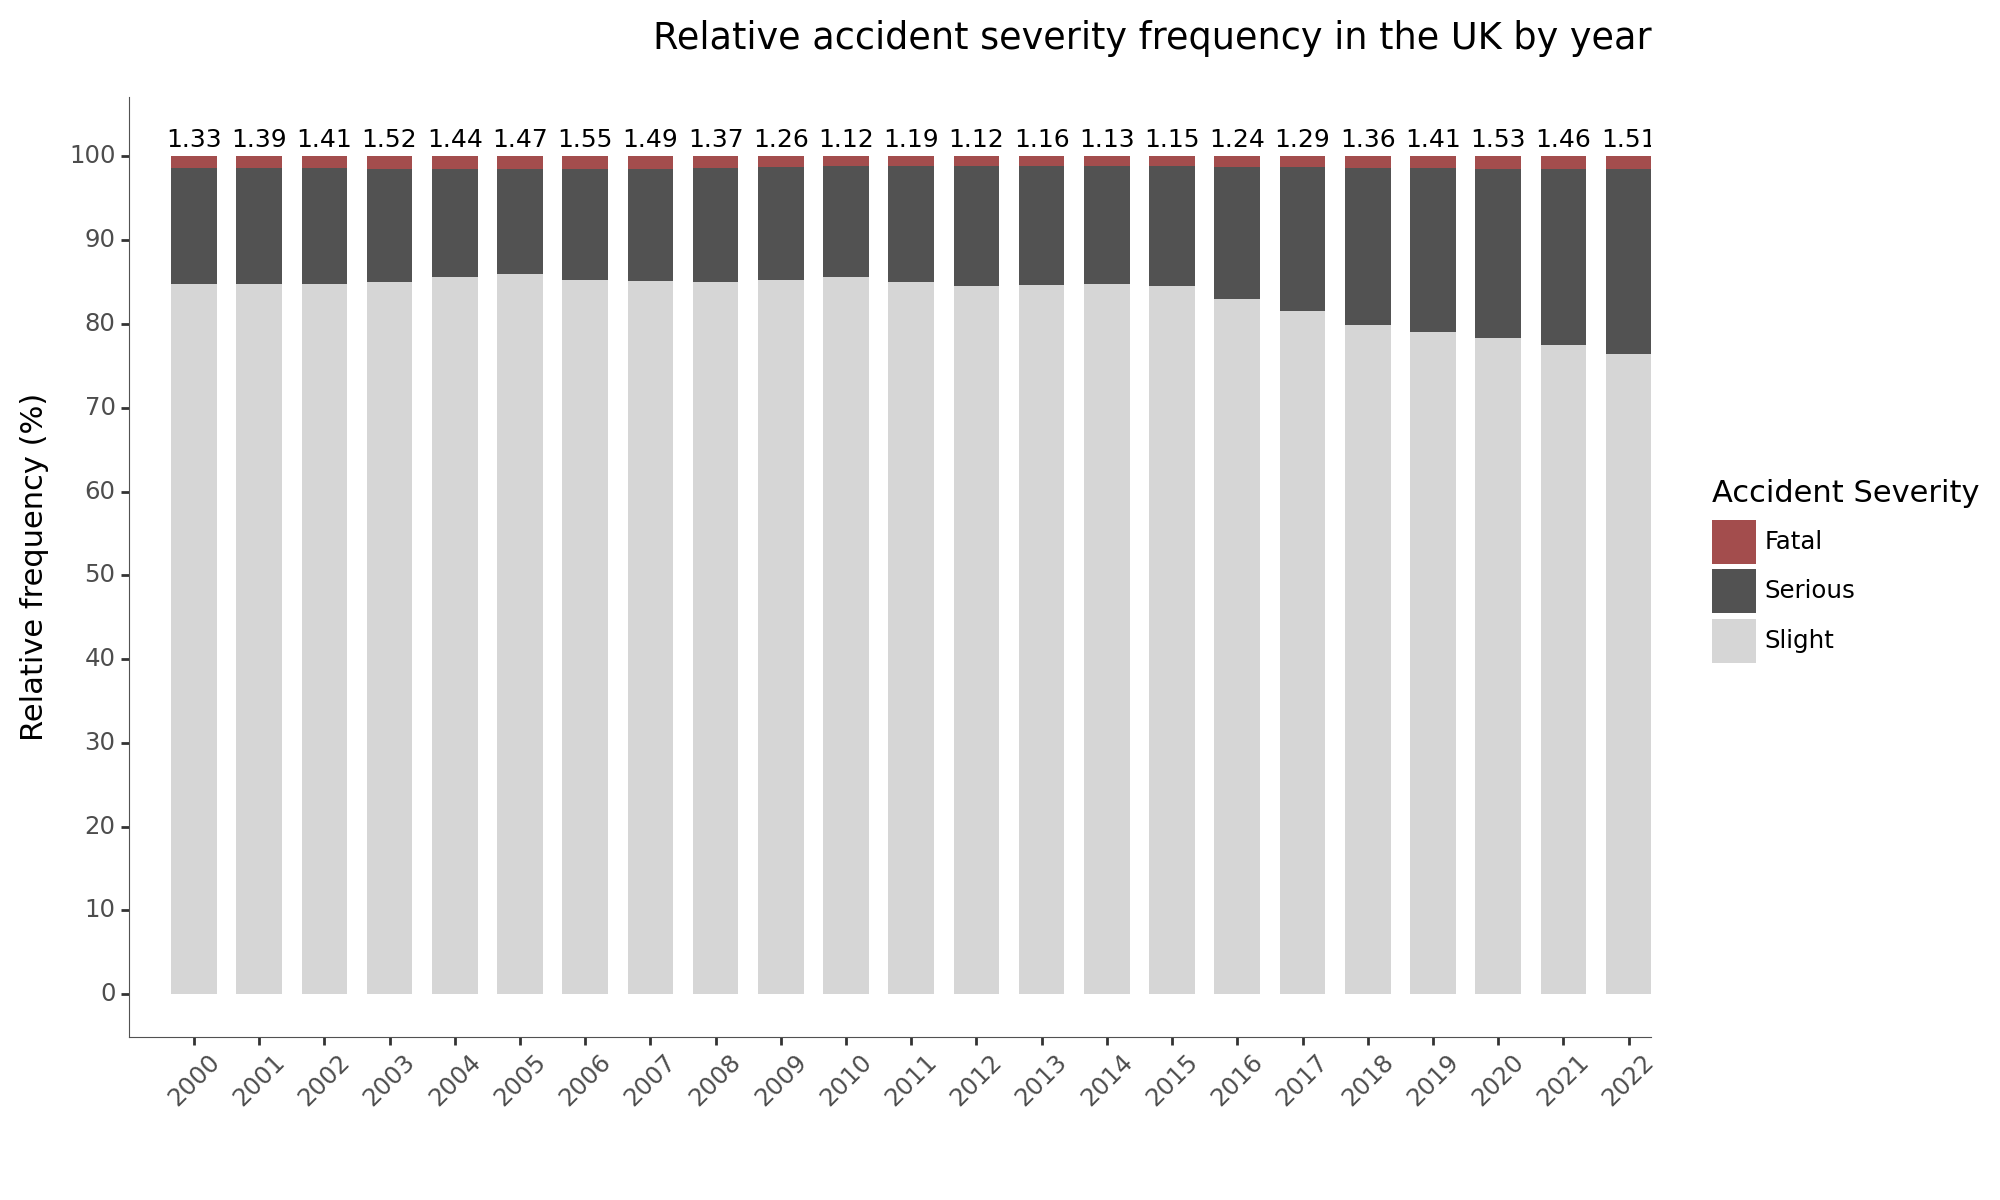

In [9]:
### Relative accident severity frequency in the UK by year
accident_severity_by_year = df_collisions.groupby(['accident_year', 'accident_severity']).size().reset_index(name='count')

# Calculate percentage distribution
accident_severity_by_year['percent'] = (
    accident_severity_by_year.groupby('accident_year')['count']
    .transform(lambda x: (x / x.sum()) * 100)
)

accident_severity = {
    1: 'Fatal',
    2: 'Serious',
    3: 'Slight'
}

accident_severity_by_year['accident_severity'] = accident_severity_by_year['accident_severity'].map(accident_severity)

plot_accident_severity_by_year = (
    ggplot(accident_severity_by_year, aes('accident_year', 'percent', fill='factor(accident_severity)')) +
    geom_col(width=0.7) + 
    geom_text(
        aes(label='round(percent, 2)', y=102), 
        data=accident_severity_by_year[accident_severity_by_year['accident_severity'] == 'Fatal'],
        position='stack', size=9, color='black'
    ) + 
    labs(title='Relative accident severity frequency in the UK by year', x='Accident Year', y='Relative frequency (%)') +
    theme_classic() +
    theme(
        axis_line_x=element_line(size=0.4, colour="#525252"),
        axis_line_y=element_line(size=0.4, colour="#525252"),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
        axis_text_x=element_text(angle=45, hjust=0.5),  
        plot_title=element_text(hjust=1), 
        axis_title_x=element_text(color="white"), 
        figure_size=(10, 6) 
    ) +
    scale_x_continuous(breaks=range(2000, int(accident_severity_by_year['accident_year'].max()) + 1, 1),
                       labels=range(2000, int(accident_severity_by_year['accident_year'].max()) + 1, 1),
                       limits=(1999, None),
                       expand=(0, 0)) +
    scale_y_continuous(breaks=range(0, int(accident_severity_by_year['percent'].max()) + 20, 10),
                       labels=lambda x: ["{:,}".format(label) for label in x])+
    scale_fill_manual(name='Accident Severity', values=["#A34D4D", "#525252", "#D6D6D6"]) 
)

print(plot_accident_severity_by_year)

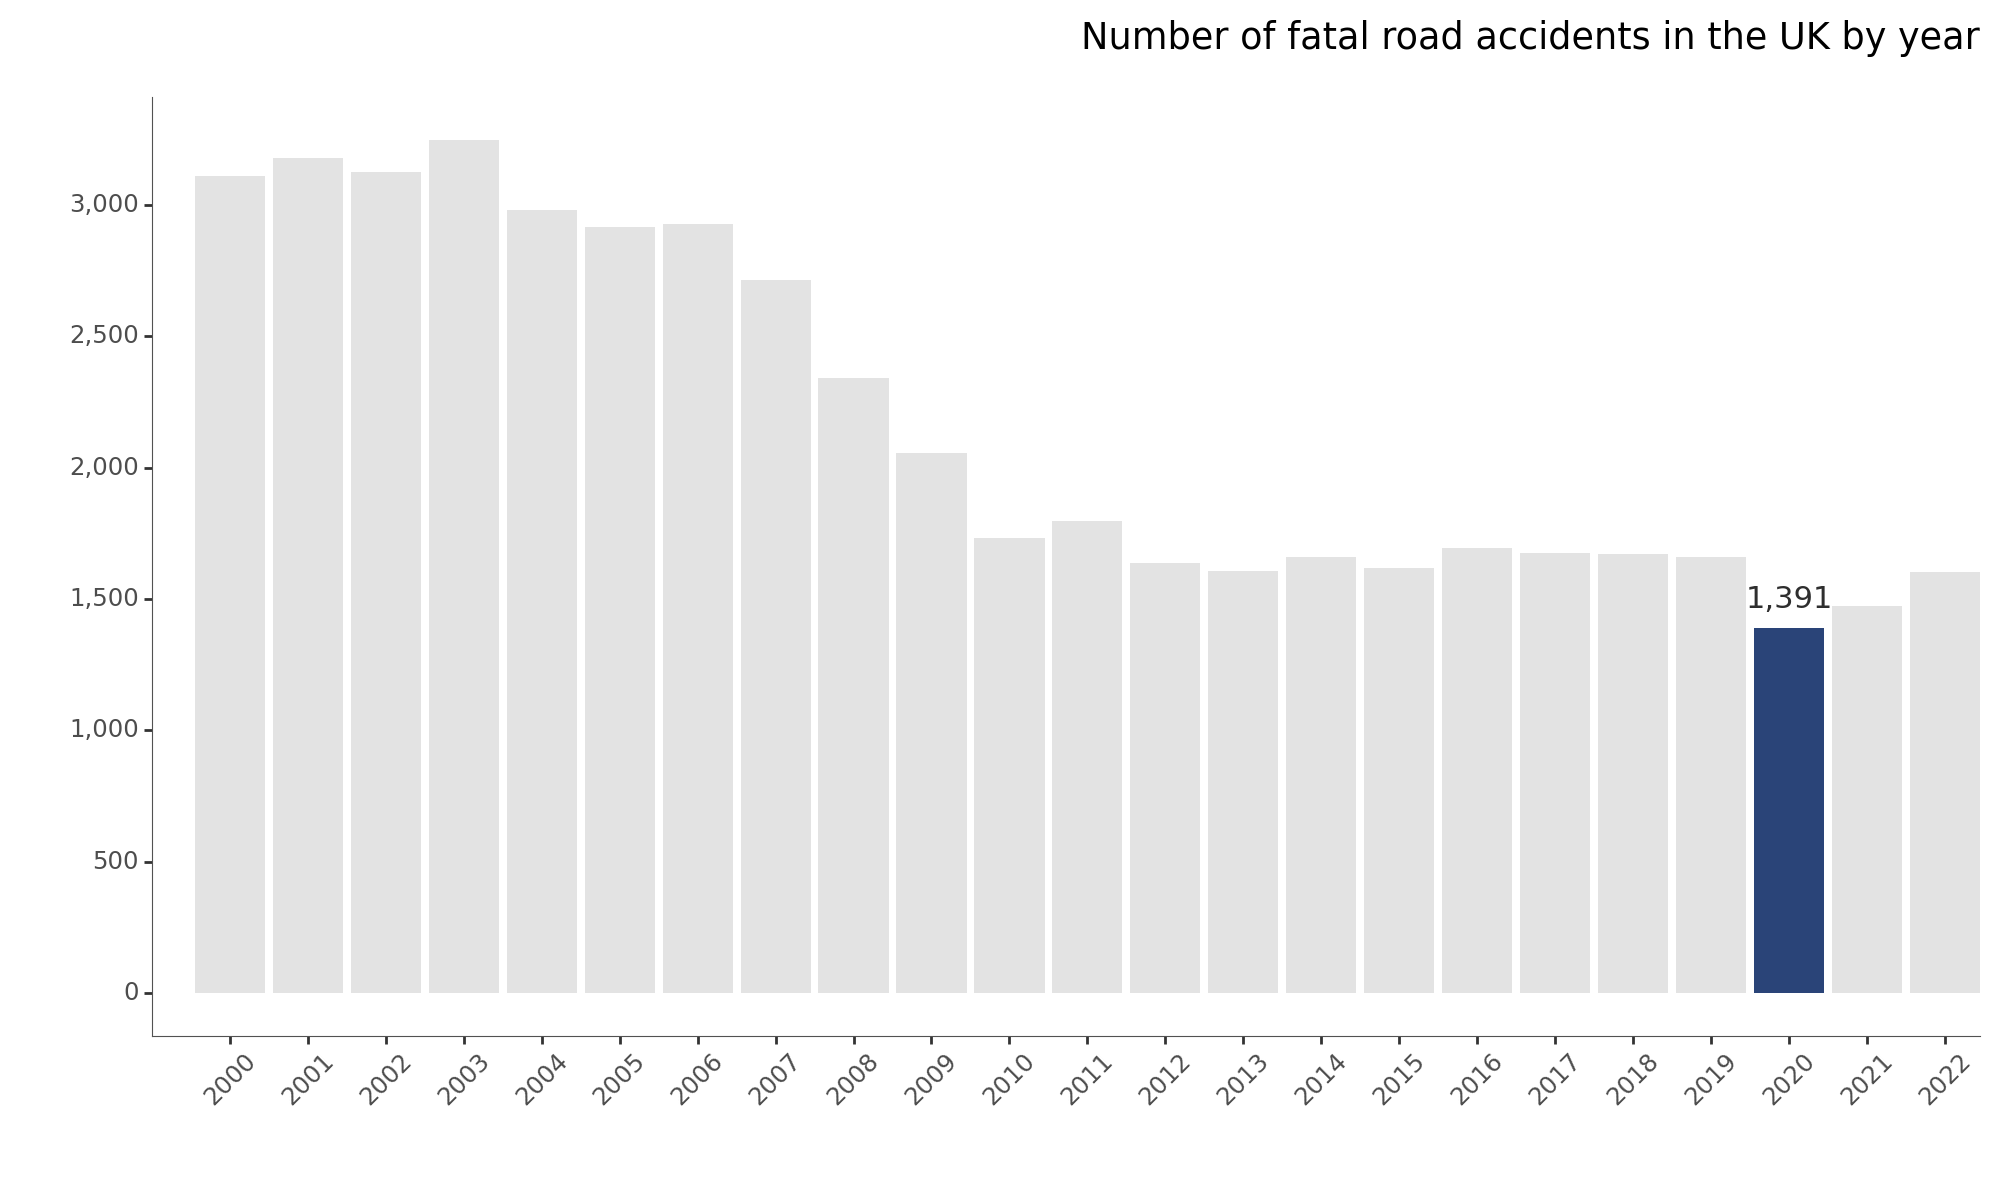

In [10]:
### Fatal accidents by year
df_accident_severity_by_year_fatal = accident_severity_by_year.loc[accident_severity_by_year['accident_severity'] == 'Fatal']

plot_accident_severity_by_year_fatal = (
    ggplot(df_accident_severity_by_year_fatal, aes(x='accident_year', y='count')) +
    geom_bar(stat='identity', fill='#e3e3e3') +
    geom_bar(df_accident_severity_by_year_fatal[df_accident_severity_by_year_fatal['accident_year'] == 2020], aes(x='accident_year', y='count'), fill='#2a4478', stat='identity') +
    geom_text(df_accident_severity_by_year_fatal[df_accident_severity_by_year_fatal['accident_year'] == 2020], aes(x='accident_year', y='count', label='count'), color='#2e2e2e', va='bottom', size=11, nudge_y=50, format_string="{:,}") +
    labs(title='Number of fatal road accidents in the UK by year') +
    theme_classic() +
    theme(
        axis_line_x=element_line(size=0.4, colour="#525252"),
        axis_line_y=element_line(size=0.4, colour="#525252"),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
        axis_text_x=element_text(angle=45, hjust=0.5),  
        plot_title=element_text(hjust=1), 
        axis_title_x=element_text(color="white"), 
        axis_title_y=element_text(color="white"),
        figure_size=(10, 6) 
    ) +
    scale_x_continuous(breaks=range(2000, int(df_accident_severity_by_year_fatal['accident_year'].max()) + 1, 1),
                       labels=range(2000, int(df_accident_severity_by_year_fatal['accident_year'].max()) + 1, 1),
                       limits=(1999, None),
                       expand=(0, 0)) +
    scale_y_continuous(breaks=range(0, int(df_accident_severity_by_year_fatal['count'].max()) + 1, 500),
                       labels=lambda x: ["{:,}".format(label) for label in x])
)

print(plot_accident_severity_by_year_fatal)

##### The number of accidents in urban areas amounts to 1,284,068, constituting approximately 34.82% of the total. Conversely, rural areas experienced a higher number of accidents, totaling 2,403,681, making up approximately 65.18% of the overall accident count. In summary, over the specified 22-year duration, rural areas recorded a higher percentage of accidents compared to urban areas.

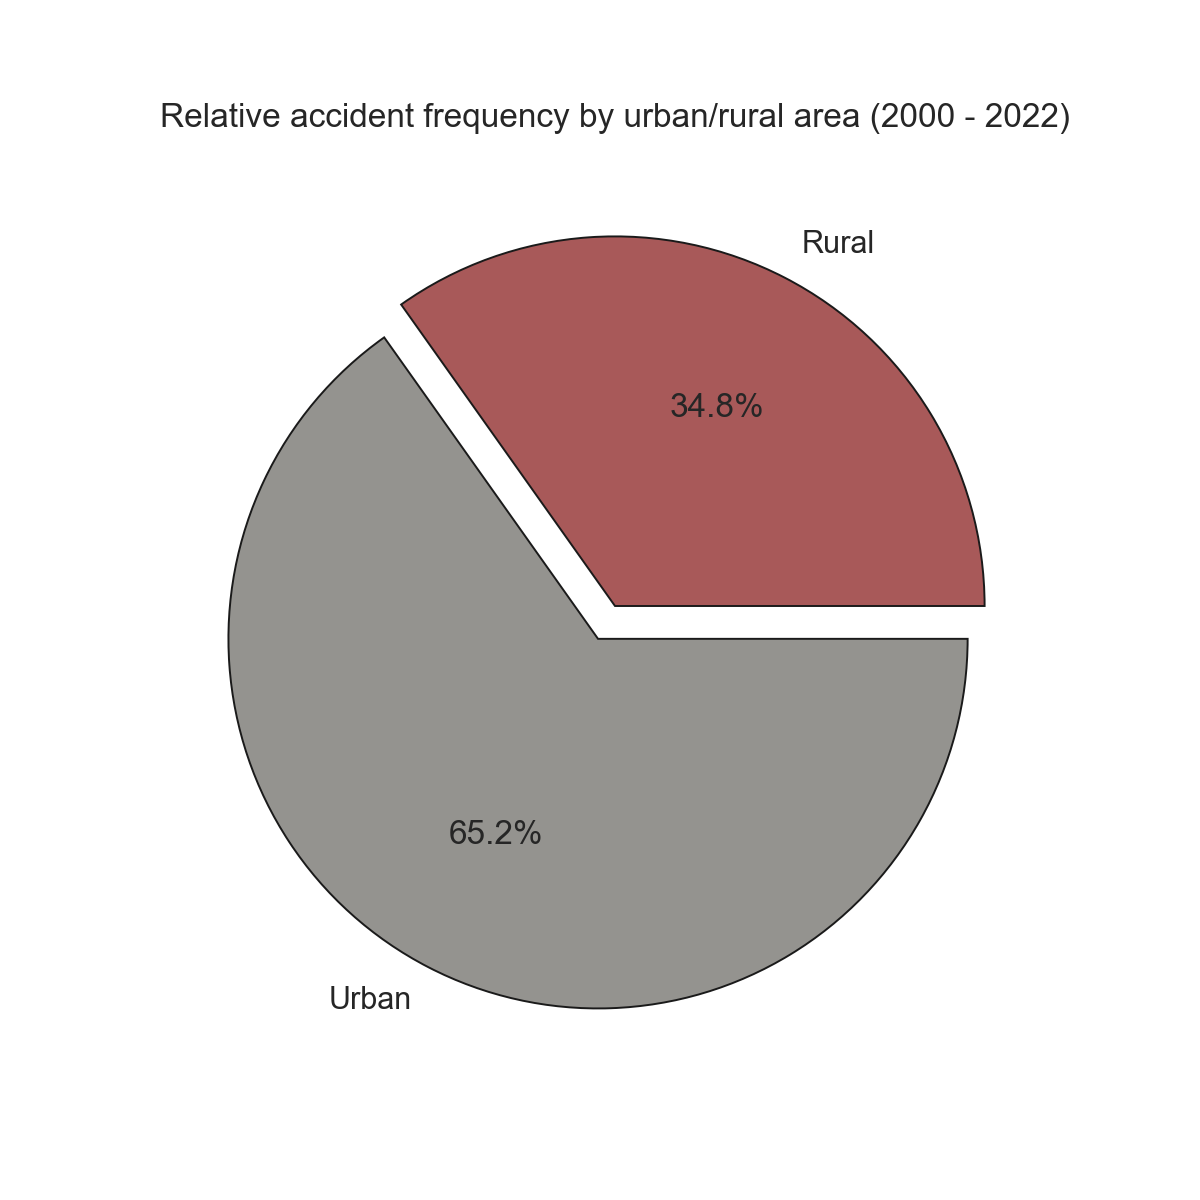

In [11]:
### Relative accident frequency by urban/rural areas
df_collisions_filtered = df_collisions[df_collisions['urban_or_rural_area'].isin([1, 2])]

urban_rural = {
    1: 'Urban',
    2: 'Rural'
}

df_collisions_filtered.loc[:, 'urban_or_rural_area'] = df_collisions_filtered['urban_or_rural_area'].map(urban_rural)

df_urban_or_rural_area = (
    df_collisions_filtered.groupby('urban_or_rural_area').size()
    .reset_index(name='accident_count')
)

# Calculate percentage
total_accidents = df_urban_or_rural_area['accident_count'].sum()
df_urban_or_rural_area['percentage'] = (df_urban_or_rural_area['accident_count'] / total_accidents) * 100

sns.set(style="whitegrid")
custom_colors = sns.color_palette(["#a85959", "#94938f"])
plt.figure(figsize=(6, 6))
explode = (0, 0.1)

plt.pie(df_urban_or_rural_area['percentage'], 
        autopct='%1.1f%%',
        colors=custom_colors, 
        explode=explode,
        labels=df_urban_or_rural_area['urban_or_rural_area'],
        wedgeprops={"edgecolor":"k",'linewidth': 0.7, 'antialiased': True})

plt.title('Relative accident frequency by urban/rural area (2000 - 2022)')

plt.show()

##### The data highlights an interesting pattern: in rural areas, there are more fatal accidents, making up 2.47%, while in urban areas, it's lower at 0.75%. Serious accidents are also more common in rural areas, accounting for a big portion at 17.56%, whereas in cities, it's a bit lower at 13.27%. One reason for this difference could be that there's more traffic in cities, so accidents happen more often, but they're usually not as serious. On the other hand, rural areas might have higher speed limits, which means when accidents do happen, they tend to be more severe.

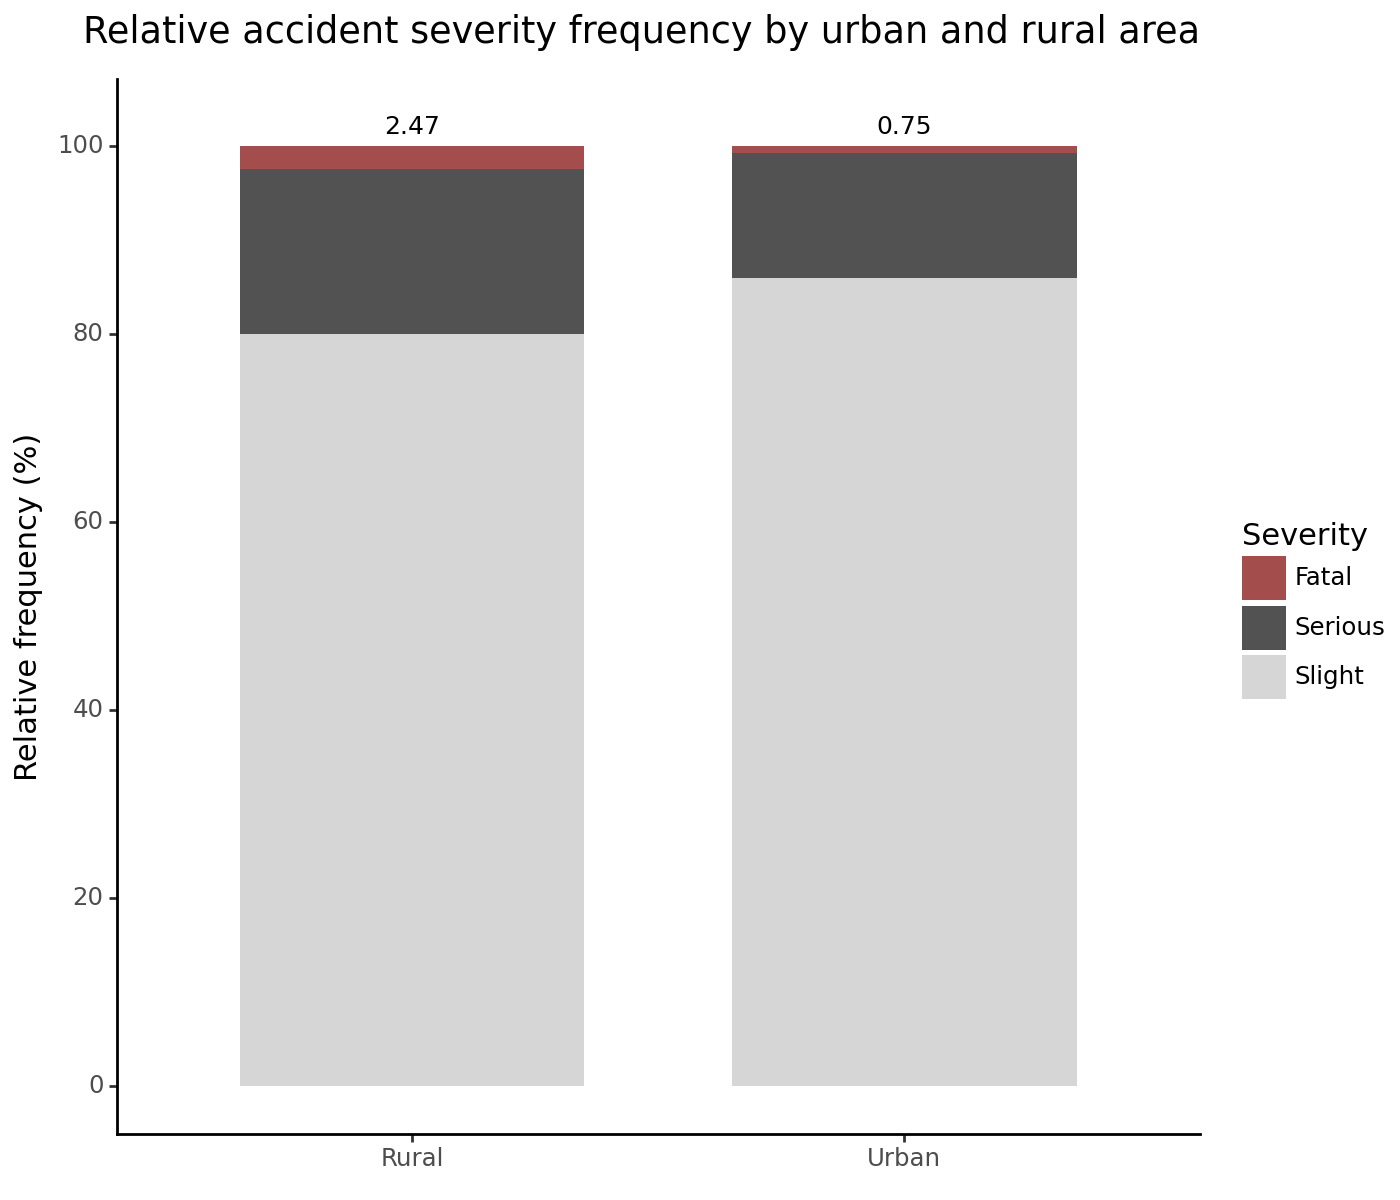

In [12]:
### Relative accident frequency by urban and rural area (with severity)
accident_severity_by_urban_rural = df_collisions_filtered.groupby(['urban_or_rural_area', 'accident_severity']).size().reset_index(name='count')

# Calculate percentages within each group (urban and rural)
accident_severity_by_urban_rural['percent'] = (
    accident_severity_by_urban_rural.groupby('urban_or_rural_area')['count']
    .transform(lambda x: (x / x.sum()) * 100)
    .round(2)  
)

accident_severity = {
    1: 'Fatal',
    2: 'Serious',
    3: 'Slight'
}

accident_severity_by_urban_rural['accident_severity'] = accident_severity_by_urban_rural['accident_severity'].map(accident_severity)

plot_accident_severity_by_urban_rural = (
    ggplot(accident_severity_by_urban_rural, aes('urban_or_rural_area', 'percent', fill='factor(accident_severity)')) +
    geom_text(
        aes(label='round(percent, 2)', y=102), 
        data=accident_severity_by_urban_rural[accident_severity_by_urban_rural['accident_severity'] == 'Fatal'],
        position='stack', size=9, color='black'
    ) +
    geom_col(width=0.7) + 
    labs(title='Relative accident severity frequency by urban and rural area', x='urban_or_rural_area', y='Relative frequency (%)') +
    theme_classic() +
    theme(
        axis_title_y=element_text(),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
        axis_text_x=element_text(hjust=0.5),
        axis_text_y=element_text(),
        plot_title=element_text(hjust=1), 
        axis_title_x=element_blank(), 
        legend_title=element_text(),
        legend_text=element_text(),     
        figure_size=(7, 6) 
    ) + 
    scale_y_continuous(breaks=range(0, int(accident_severity_by_urban_rural['percent'].max()) + 20, 20),
                       labels=lambda x: ["{:,}".format(label) for label in x])+
    scale_fill_manual(name='Severity', values=["#A34D4D", "#525252", "#D6D6D6"]) 
)

print(plot_accident_severity_by_urban_rural)

In [13]:
# Dictionary for renaming the important features (junction detail and road type)

accident_severity_dict = { 
    1: 'Fatal', 2: 'Serious', 3: 'Slight'
    }
junction_detail_dict = {
    0: 'Not Jct', 1: 'Roundabout', 2: 'Roundabout', 3: 'T/Staggered Jct', 5: 'Slip Road', 6: 'Crossroads', 
    7: 'Multi-Arm Jct', 8: 'Private Drive', 9: 'Other Jct', 99: 'Unknown', -1: 'Unknown'
    }
junction_control_dict = {
    0: 'Not Jct', 1: 'Auth. Person', 2: 'Traffic Signal', 3: 'Stop Sign', 4: 'Give Way/Unctrl', 
    -1: 'Unknown', 9: 'Unknown'
    }

# Dictionary of dictionaries for renaming
rename_dict = {
    'accident_severity': accident_severity_dict,
    'junction_detail' : junction_detail_dict,
    'junction_control' : junction_control_dict
}

# Loop through the dictionary to rename values
for column, mapping_dict in rename_dict.items():
    if column in df_collisions.columns: 
        df_collisions[column] = df_collisions[column].replace(mapping_dict)
        if column != 'accident_severity':
            df_collisions[column] = df_collisions[column].astype('category')

In [14]:
# Bin the speed limits into 'unknown', 'under_20', '20-29', '30-39', '40-49', '50-59', '60-69', '70_or_more'
bin_edges = [-np.inf, -1, 29, 39, 49, 59, 69, np.inf]
bin_labels = ['Unknown', 'Under 30', '30', '40', '50', '60', '70 Or Over']
df_collisions['binned_speed_limit'] = pd.cut(df_collisions['speed_limit'], bins = bin_edges, labels = bin_labels, include_lowest = True)

In [15]:
df_collisions.head()

,accident_index,accident_year,longitude,latitude,accident_severity,number_of_casualties,road_type,speed_limit,junction_detail,junction_control,urban_or_rural_area,binned_speed_limit
0,2000010SU0982,2000,-0.232572,51.688371,Slight,3,3,70.0,Not Jct,Unknown,2,70 Or Over
1,2000010SU0983,2000,-0.032110,51.726908,Slight,1,12,70.0,Roundabout,Give Way/Unctrl,2,70 Or Over
2,2000010SU0984,2000,-0.271588,51.723752,Slight,1,6,60.0,Not Jct,Unknown,2,60
3,2000010SU0985,2000,-0.253731,51.706222,Slight,1,3,70.0,Not Jct,Unknown,2,70 Or Over
4,2000010SU0986,2000,-0.218557,51.684203,Slight,1,3,70.0,Slip Road,Give Way/Unctrl,2,70 Or Over


In [23]:
# Splitting the dataframe into specific dataframes for each plot

# Create a dataset for plotting junction detail vs. accident severity
df_junction_detail = df_collisions[['junction_detail', 'accident_severity']].copy()
df_junction_detail_filtered = df_junction_detail[df_junction_detail['junction_detail'] != 'Unknown']
df_junction_detail_filtered.loc[:, 'junction_detail'] = df_junction_detail_filtered['junction_detail'].cat.remove_categories(['Unknown'])

# Create a dataset for plotting junction control vs. accident severity
df_junction_control = df_collisions[['junction_control', 'accident_severity']].copy()
df_junction_control_filtered = df_junction_control[df_junction_control['junction_control'] != 'Unknown']
df_junction_control_filtered.loc[:, 'junction_control'] = df_junction_control_filtered['junction_control'].cat.remove_categories(['Unknown'])

# Create a dataset for plotting binned speed limit vs. accident severity
df_speed_limit = df_collisions[['binned_speed_limit', 'accident_severity']].copy()
df_speed_limit_filtered = df_speed_limit[df_speed_limit['binned_speed_limit'] != 'Unknown']
df_speed_limit_filtered.loc[:, 'binned_speed_limit'] = df_speed_limit_filtered['binned_speed_limit'].cat.remove_categories(['Unknown'])


#### Junction detail

C:\Users\Nikolay\AppData\Local\Temp\ipykernel_7040\3336675938.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
C:\Users\Nikolay\AppData\Local\Temp\ipykernel_7040\3336675938.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


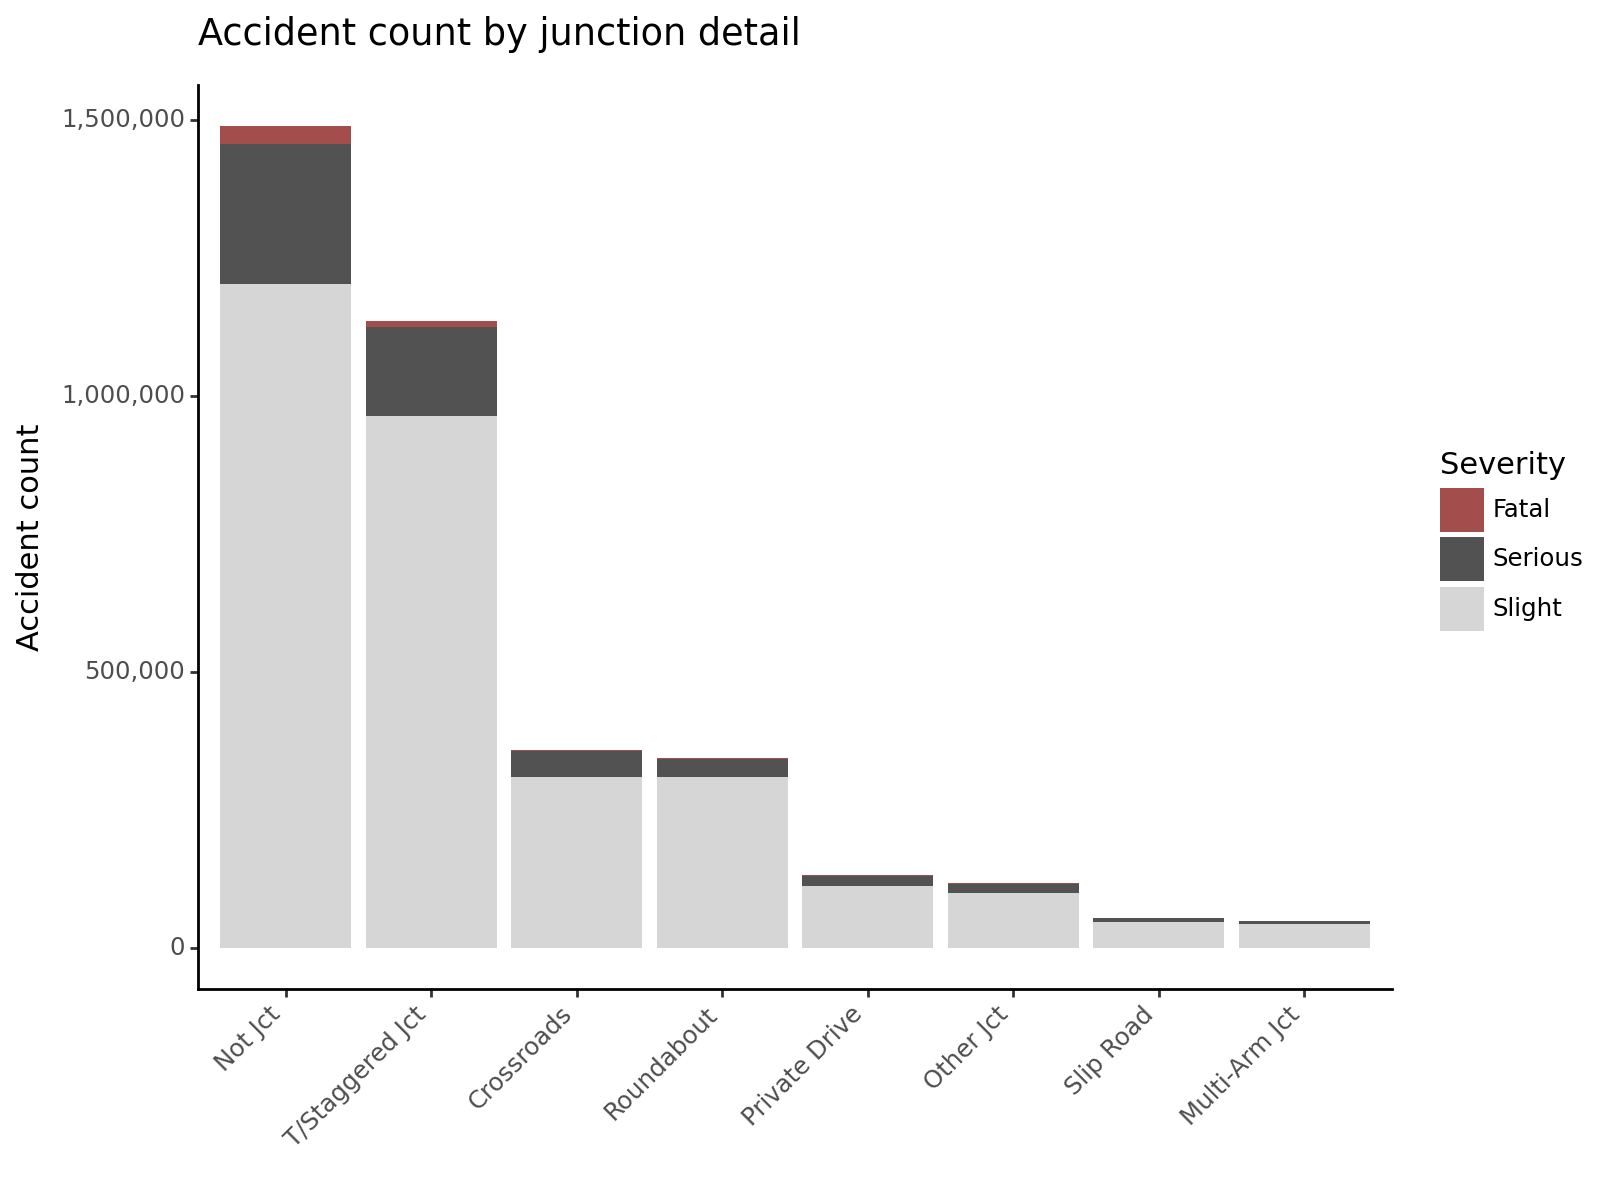

In [48]:
# Count vs Junction Detail

# Calculate the count of each accident severity within each junction detail
df_grouped = df_junction_detail_filtered.groupby(['junction_detail', 'accident_severity']).size().reset_index(name='count')

# Calculate the total count for each junction detail
df_total_counts = df_grouped.groupby('junction_detail')['count'].sum().reset_index(name='total_count')

# Merge the total counts back to the grouped dataframe
df_grouped = df_grouped.merge(df_total_counts, on='junction_detail')

# Plot
plot = (
    ggplot(df_grouped, aes(x='reorder(junction_detail, -total_count)', y='count', fill='accident_severity')) +
    geom_bar(stat='identity', position='stack') + 
    scale_fill_manual(values=["#A34D4D", "#525252", "#D6D6D6"]) +  
    labs(y="Accident count", x="", title="Accident count by junction detail", fill="Severity",) +
    scale_y_continuous(labels=lambda x: ["{:,}".format(int(label)) for label in x]) +
    theme_classic() +
    theme(
        #axis_text_x=element_blank(),
        axis_text_x=element_text(angle=45, hjust=1),
        axis_text_y=element_text(),
        legend_title=element_text(),
        legend_text=element_text(),
        figure_size=(8, 6)
    )
)

print(plot)

#ggsave(plot, "../4_other/acc_jct_detail.svg", format="svg")

In [33]:
# Calculate percentage

# Filter for only fatal accidents
df_fatal = df_junction_detail_filtered[df_junction_detail_filtered['accident_severity'] == 'Fatal']

# Group by junction_detail and count the number of fatal accidents
df_fatal_counts = df_fatal.groupby('junction_detail').size().reset_index(name='fatal_count')

# Group the original filtered dataframe by junction_detail and count the total accidents
df_total_counts = df_junction_detail_filtered.groupby('junction_detail').size().reset_index(name='total_count')

# Merge the fatal counts with the total counts
df_percentage = pd.merge(df_fatal_counts, df_total_counts, on='junction_detail')

# Calculate the percentage of fatal accidents
df_percentage['fatal_percentage'] = df_percentage['fatal_count'] / df_percentage['total_count'] * 100
df_percentage

C:\Users\Nikolay\AppData\Local\Temp\ipykernel_7040\2782993665.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
C:\Users\Nikolay\AppData\Local\Temp\ipykernel_7040\2782993665.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


,junction_detail,fatal_count,total_count,fatal_percentage
0,Crossroads,2868,359010,0.798864
1,Multi-Arm Jct,328,49284,0.665530
2,Not Jct,31751,1489642,2.131452
3,Other Jct,1130,117513,0.961596
4,Private Drive,1379,132013,1.044594
5,Roundabout,1211,344436,0.351589
6,Slip Road,780,54626,1.427891
7,T/Staggered Jct,10340,1136275,0.909991


#### Junction control

C:\Users\Nikolay\AppData\Local\Temp\ipykernel_7040\1518658930.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
C:\Users\Nikolay\AppData\Local\Temp\ipykernel_7040\1518658930.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


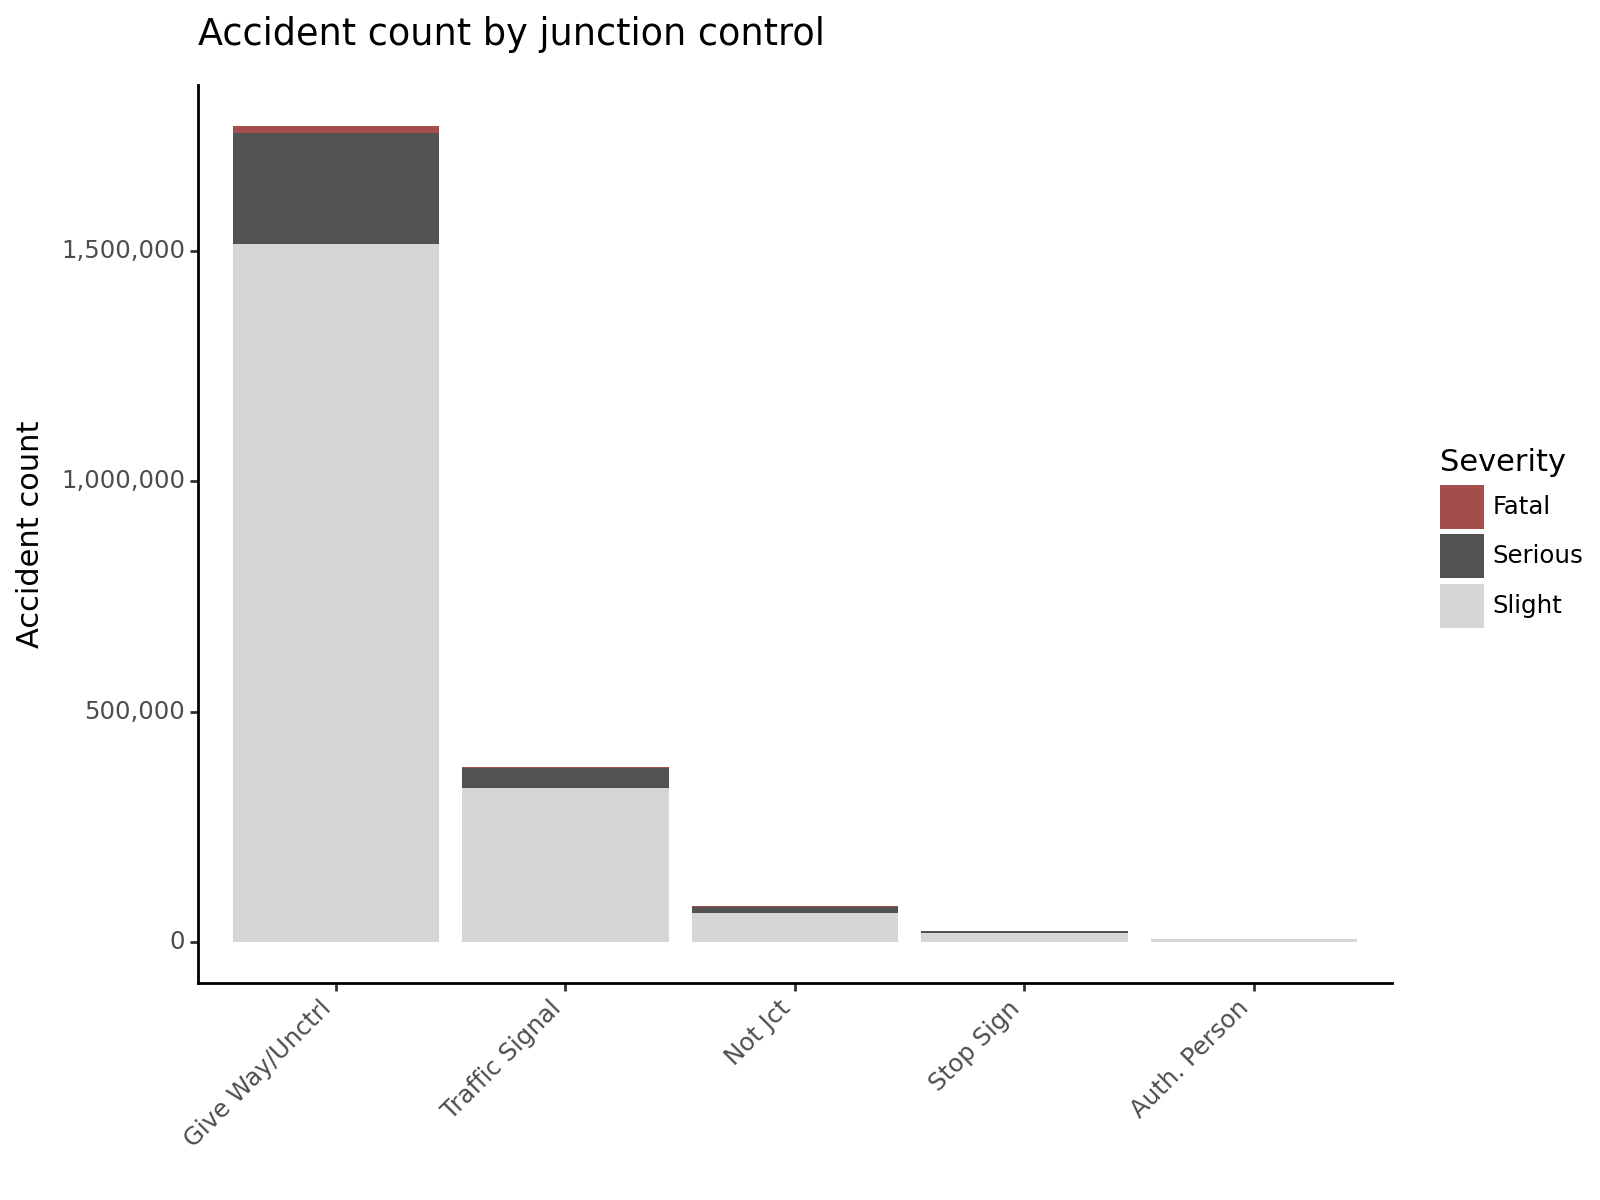

In [49]:
# Count vs Junction Control

# Calculate the count of each accident severity within each junction detail
df_grouped = df_junction_control_filtered.groupby(['junction_control', 'accident_severity']).size().reset_index(name='count')

# Calculate the total count for each junction detail
df_total_counts = df_grouped.groupby('junction_control')['count'].sum().reset_index(name='total_count')

# Merge the total counts back to the grouped dataframe
df_grouped = df_grouped.merge(df_total_counts, on='junction_control')

# Plot
plot = (
    ggplot(df_grouped, aes(x='reorder(junction_control, -total_count)', y='count', fill='accident_severity')) +
    geom_bar(stat='identity', position='stack') +  # Stacked bar plot
    scale_fill_manual(values=["#A34D4D", "#525252", "#D6D6D6"]) +  # Specify your colors here
    labs(y="Accident count", x="", title="Accident count by junction control", fill="Severity",) +
    scale_y_continuous(labels=lambda x: ["{:,}".format(int(label)) for label in x]) +
    theme_classic() +
    theme(
        #axis_text_x=element_blank(),
        axis_text_x=element_text(angle=45, hjust=1),
        axis_text_y=element_text(),
        legend_title=element_text(),
        legend_text=element_text(),
        figure_size=(8, 6)
    )
)

print(plot)

#ggsave(plot, "../4_other/acc_jct_control.svg", format="svg")

In [38]:
# Calculate percentage

# Filter for only fatal accidents
df_fatal = df_junction_control_filtered[df_junction_control_filtered['accident_severity'] == 'Fatal']

# Group by junction_detail and count the number of fatal accidents
df_fatal_counts = df_fatal.groupby('junction_control').size().reset_index(name='fatal_count')

# Group the original filtered dataframe by junction_detail and count the total accidents
df_total_counts = df_junction_control_filtered.groupby('junction_control').size().reset_index(name='total_count')

# Merge the fatal counts with the total counts
df_percentage = pd.merge(df_fatal_counts, df_total_counts, on='junction_control')

# Calculate the percentage of fatal accidents
df_percentage['fatal_percentage'] = df_percentage['fatal_count'] / df_percentage['total_count'] * 100

df_percentage

C:\Users\Nikolay\AppData\Local\Temp\ipykernel_7040\121806986.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
C:\Users\Nikolay\AppData\Local\Temp\ipykernel_7040\121806986.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


,junction_control,fatal_count,total_count,fatal_percentage
0,Auth. Person,32,7291,0.438897
1,Give Way/Unctrl,15352,1771664,0.866530
2,Not Jct,1689,77308,2.184767
3,Stop Sign,182,23521,0.773777
4,Traffic Signal,2389,380122,0.628482


#### Speed limit

C:\Users\Nikolay\AppData\Local\Temp\ipykernel_7040\3672723109.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
C:\Users\Nikolay\AppData\Local\Temp\ipykernel_7040\3672723109.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


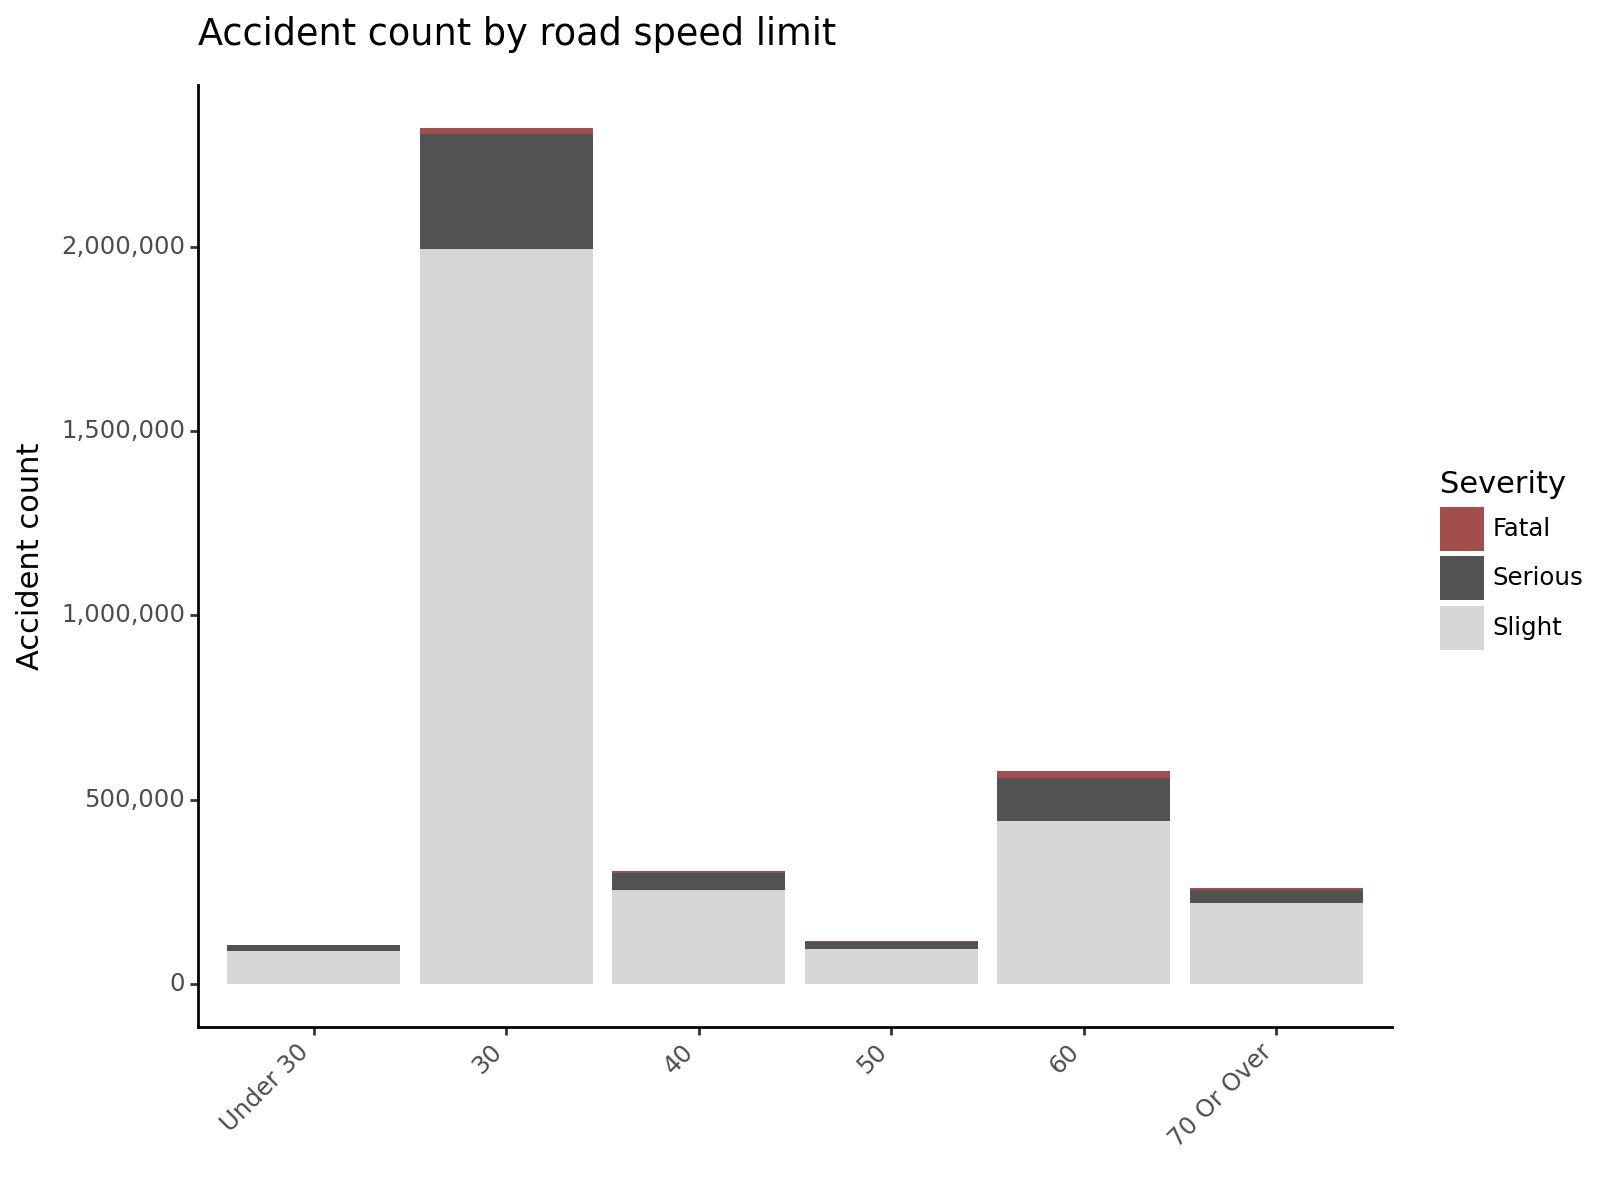

In [50]:
# Count vs Speed Limit

# Calculate the count of each accident severity within each junction detail
df_grouped = df_speed_limit_filtered.groupby(['binned_speed_limit', 'accident_severity']).size().reset_index(name='count')

# Calculate the total count for each junction detail
df_total_counts = df_grouped.groupby('binned_speed_limit')['count'].sum().reset_index(name='total_count')

# Merge the total counts back to the grouped dataframe
df_grouped = df_grouped.merge(df_total_counts, on='binned_speed_limit')

# Plot
plot = (
    ggplot(df_grouped, aes(x='binned_speed_limit', y='count', fill='accident_severity')) +
    geom_bar(stat='identity', position='stack') +  # Stacked bar plot
    scale_fill_manual(values=["#A34D4D", "#525252", "#D6D6D6"]) +  # Specify your colors here
    labs(y="Accident count", x="", title="Accident count by road speed limit", fill="Severity",) +
    scale_y_continuous(labels=lambda x: ["{:,}".format(int(label)) for label in x]) +
    theme_classic() +
    theme(
        axis_text_x=element_text(angle=45, hjust=1),
        axis_text_y=element_text(),
        legend_title=element_text(),
        legend_text=element_text(),
        figure_size=(8, 6)
    )
)

print(plot)

#ggsave(plot, "../4_other/acc_speed_lim.svg", format="svg")

In [51]:
# Calculate percentage

# Filter for only fatal accidents
df_fatal = df_speed_limit_filtered[df_speed_limit_filtered['accident_severity'] == 'Fatal']

# Group by junction_detail and count the number of fatal accidents
df_fatal_counts = df_fatal.groupby('binned_speed_limit').size().reset_index(name='fatal_count')

# Group the original filtered dataframe by junction_detail and count the total accidents
df_total_counts = df_speed_limit_filtered.groupby('binned_speed_limit').size().reset_index(name='total_count')

# Merge the fatal counts with the total counts
df_percentage = pd.merge(df_fatal_counts, df_total_counts, on='binned_speed_limit')

# Calculate the percentage of fatal accidents
df_percentage['fatal_percentage'] = df_percentage['fatal_count'] / df_percentage['total_count'] * 100

df_percentage

C:\Users\Nikolay\AppData\Local\Temp\ipykernel_7040\2243565802.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
C:\Users\Nikolay\AppData\Local\Temp\ipykernel_7040\2243565802.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


,binned_speed_limit,fatal_count,total_count,fatal_percentage
0,Under 30,496,106486,0.465789
1,30,16475,2322502,0.709364
2,40,4647,306894,1.514204
3,50,2743,115665,2.371504
4,60,19056,578882,3.291863
5,70 Or Over,6381,261093,2.443957
